<a href="https://colab.research.google.com/github/Dimisz/tensorflow_projects/blob/main/time_series/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data

Data downloaded from https://www.coindesk.com/price/bitcoin/ on September 14, 2021

For the CSV file used in the project, [see the GitHub repo](https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv).

In [1]:
!wget https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv

--2021-10-14 23:59:47--  https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167143 (163K) [text/plain]
Saving to: ‘BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv’

BTC_USD_2014-11-04_ 100%[===================>] 163.23K  --.-KB/s    in 0.008s  

2021-10-14 23:59:48 (19.3 MB/s) - ‘BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv’ saved [167143/167143]



### Read the data to a DataFrame using pandas

In [2]:
import pandas as pd

#Read the data, parse the date column and assign it to be the index
df = pd.read_csv("/content/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv",
                 parse_dates=['Date'],
                 index_col=['Date'])

In [3]:
df.head(), len(df)

(           Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2014-11-04      BTC            324.71833  ...       332.75133      323.06333
 2014-11-05      BTC            332.45666  ...       335.81166      320.93333
 2014-11-06      BTC            336.58500  ...       341.49000      328.56166
 2014-11-07      BTC            346.77500  ...       351.57500      336.02833
 2014-11-08      BTC            344.81166  ...       351.29500      339.86000
 
 [5 rows x 5 columns], 2507)

In [4]:
# Check if there are any missing values
df.isna().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

### Create a new dataframe we'll be working with.
* We'll just keep the closing price (and data as an index column).
* `Closing Price (USD)` column willl be renamed to `Price`

In [5]:
btc_df = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


### Visualize the bitcoin prices.

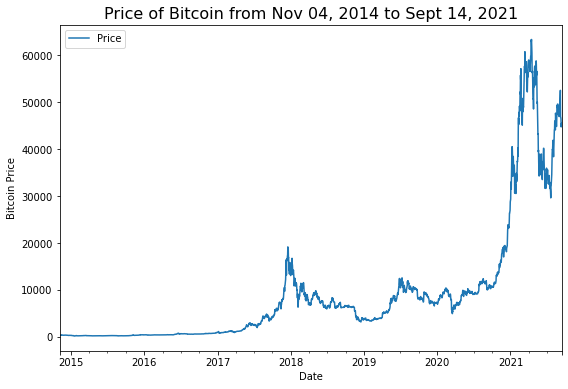

In [6]:
import matplotlib.pyplot as plt
btc_df.plot(figsize=(9,6))
plt.ylabel("Bitcoin Price")
plt.title("Price of Bitcoin from Nov 04, 2014 to Sept 14, 2021", fontsize=16);

### Read in the data with python's CSV module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price= []

with open("/content/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip the first line (column titles)
  for line in csv_reader:
    #get the dates in date format (convert from string to date)
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    #get the closing price as float
    btc_price.append(float(line[2]))


In [8]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0),
  datetime.datetime(2014, 11, 13, 0, 0)],
 [324.71833,
  332.45666,
  336.585,
  346.775,
  344.81166,
  343.065,
  358.50166,
  368.07666,
  376.99666,
  442.10666])

### Plot from CSV

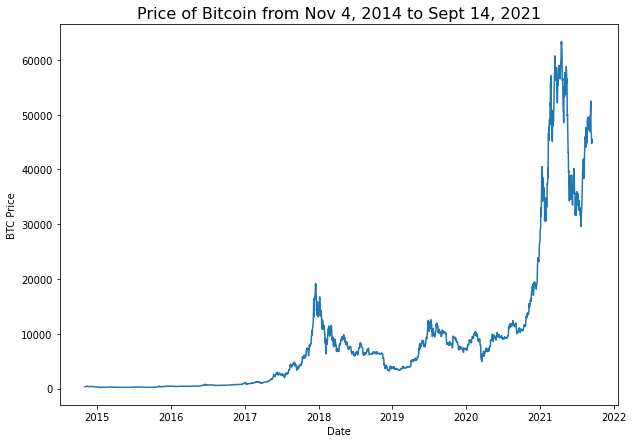

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Nov 4, 2014 to Sept 14, 2021", fontsize=16)
plt.xlabel("Date");

## Format Data, Part 1

### Create, Train and Test sets of our Time Series Data

#### Creating train and test sets with time series data (the wrong way)

In [10]:
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [11]:
# Get bitcoin date array
timesteps = btc_df.index.to_numpy()
prices = btc_df['Price'].to_numpy()

In [12]:
timesteps[:10], prices[:10]

(array(['2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000',
        '2014-11-12T00:00:00.000000000', '2014-11-13T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
        358.50166, 368.07666, 376.99666, 442.10666]))

In [13]:
# The wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2005,), (502,), (2005,), (502,))

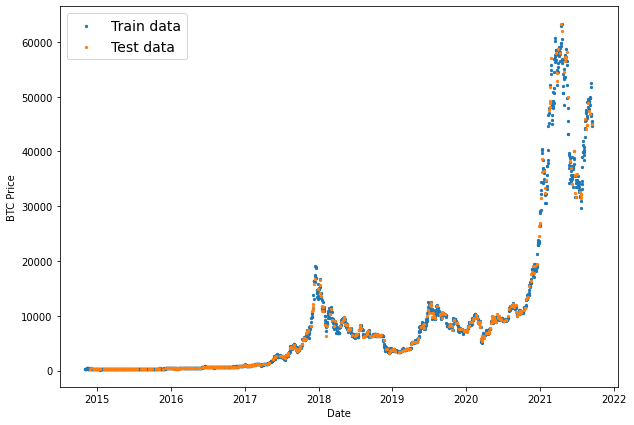

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#### Creating train and test sets with time series data (the right way)

In [15]:
split_size = int(0.8 * len(prices)) # 80% training / 20% test

In [16]:
# Create train dataset
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test dataset
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2005, 502, 2005, 502)

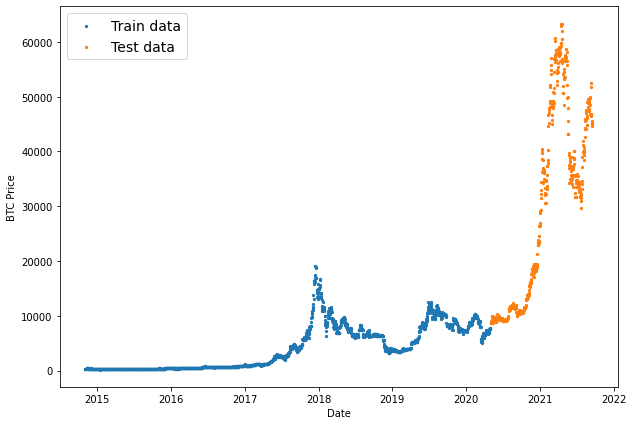

In [17]:
# Let's plot the train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#### Create a plotting function

In [18]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) 
  against values (a series of values across time)

  Parameters
  ----------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default : None

  """
  
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  
  plt.grid(True)

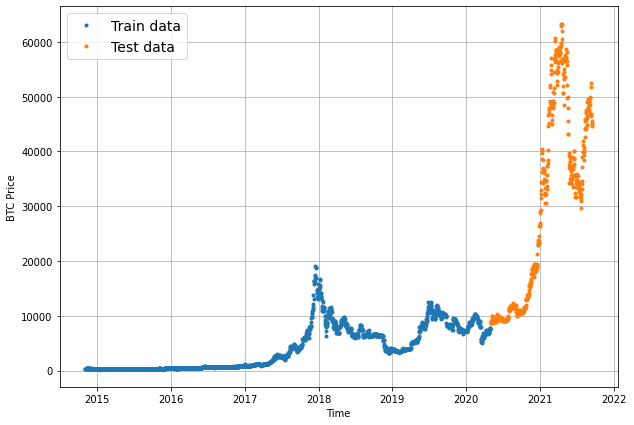

In [19]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

Terms to be familiar with:
* **`Horizon`** - number of steps into the future we are going to predicct.

* **`Window size`** - number of timesteps we're going to use to predict horizon

### Model 0. Naive Forecast (Baseline)

The formula:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1

In [20]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([8767.67262337, 8853.77448401, 8963.0575578 , 8904.71381654,
        8887.50589259, 8978.28358712, 9371.68427279, 9900.67886662,
        9917.24841434, 9617.51819493]),
 array([49709.61199434, 49999.55557859, 51693.80939808, 52506.68564748,
        46897.60147675, 46769.31439122, 46404.36448102, 44720.75555014,
        45253.13062479, 45510.56324938]))

In [21]:
y_test[-10:]

array([49999.55557859, 51693.80939808, 52506.68564748, 46897.60147675,
       46769.31439122, 46404.36448102, 44720.75555014, 45253.13062479,
       45510.56324938, 45097.79721752])

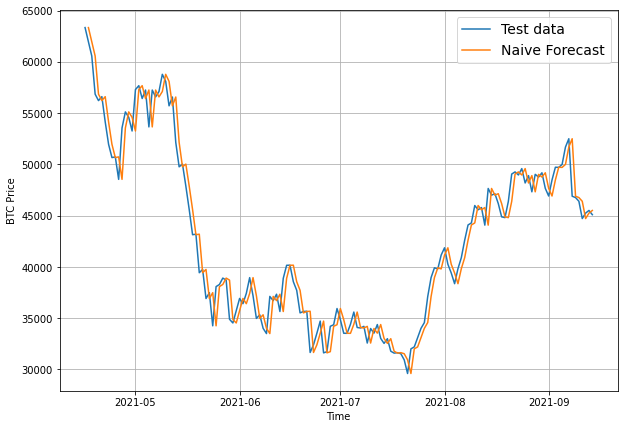

In [22]:
# Plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data", start=200)
plot_time_series(timesteps=X_test, values=y_test, label="Test data", format='-', start=350)
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label="Naive Forecast", start=350)

#### Reference book: 'Forecasting: Principles in Practice'

### Evaluating a TimeSeries model

We're predicting a number, i.e. it's a form of regression problem.

Because we're working on a regression problem, we need regression metrics:

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error

We're evaluating **how does our model forecast compared to the actual values?**

Reference: Forecasting: Principles and Practice, chapter 5.8

In [23]:
import tensorflow as tf

In [24]:
# MASE implementation (since there's no appropriate function in tensorflow)
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implementing MASE (assuming no seasonality of data, i.e. data is not influenced by season of the year).

  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # Find MAE of naive forecast / seasonality (data published daily) is 1 days, hence shift 1 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season



In [25]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9982082921428425

#### Custom Evaluation Function

In [26]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [27]:
naive_results = evaluate_preds(y_true=y_test[1:], 
                               y_pred=naive_forecast)
naive_results

{'mae': 839.7061,
 'mape': 2.6012962,
 'mase': 0.9982083,
 'mse': 1825811.2,
 'rmse': 1351.2258}

In [28]:
# average price
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=28914.90424048091>

In [29]:
# max / min prices
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=8608.125245038>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Formatting Data Part 2 : Windowing the Dataset

```
Windowing for one week
[0,1,2,3,4,5,6] --> [7]
[1,2,3,4,5,6,7] --> [8]
[2,3,4,5,6,7,8] --> [9]
window = 7 --> horizon = 1
```

In [30]:
len(y_train)

2005

In [31]:
print(f"We want to use {btc_price[:7]} to predict {btc_price[7]}")

We want to use [324.71833, 332.45666, 336.585, 346.775, 344.81166, 343.065, 358.50166] to predict 368.07666


In [32]:
# Set global variables for window and horizon
HORIZON = 1 #predict next 1 day
WINDOW_SIZE = 7 # use the past week of data

### Create function to label windowed data

In [33]:
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [34]:
# Test the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


### Apply the windowing function for the entire timeseries


We'll use numpy array indexing since using python for loops is time costly.

The function will:
* Create a window step of a specific window size (e.g. [0,1,2,3,4,5,6])
* Use numpy indexing to create a 2D array of multiple window steps, e.g.:
```
[[0,1,2,3,4,5,6],
 [1,2,3,4,5,6,7],
 [2,3,4,5,6,7,8]]
```
* Use the 2D array of multiple window steps (from 2.) to index on a target series (e.g. historical price of bitcoin).
* Use the `get_labelled_windows()` function to turn the window steps into windows with a specified horizon.

In [35]:
# Create the function
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  # 2. Use numpy indexing to create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indeces = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T #create 2D array of windows of windows_size

  #print(f"Window indeces:\n {window_indeces}{window_indeces.shape}")

  # 3. Index on the target array (a timeseries) with 2D array of multiple window steps
  windowed_array = x[window_indeces]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2500, 2500)

In [37]:
len(prices)

2507

In [38]:
# Check the first 3 windows and labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [49999.55557859 51693.80939808 52506.68564748 46897.60147675
 46769.31439122 46404.36448102 44720.75555014] -> Label: [45253.13062479]
Window: [51693.80939808 52506.68564748 46897.60147675 46769.31439122
 46404.36448102 44720.75555014 45253.13062479] -> Label: [45510.56324938]
Window: [52506.68564748 46897.60147675 46769.31439122 46404.36448102
 44720.75555014 45253.13062479 45510.56324938] -> Label: [45097.79721752]


In [39]:
prices[-1]

45097.7972175205

#### similar: tf.keras.preprocessing.timeseries_dataset_from_array

## Create train & train sets for windowed dataset

In [40]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and pairs into train and test split
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [41]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

In [42]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2000, 500, 2000, 500)

In [43]:
len(full_windows) * 0.8

2000.0

In [44]:
train_windows[:5], train_labels[:5]

(array([[324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666],
        [346.775  , 344.81166, 343.065  , 358.50166, 368.07666, 376.99666,
         442.10666],
        [344.81166, 343.065  , 358.50166, 368.07666, 376.99666, 442.10666,
         389.00333]]), array([[368.07666],
        [376.99666],
        [442.10666],
        [389.00333],
        [394.92666]]))

In [45]:
test_windows[:5], test_labels[:5]

(array([[7542.3034007 , 7624.85378592, 7776.50754257, 7761.75878408,
         8773.10648796, 8767.67262337, 8853.77448401],
        [7624.85378592, 7776.50754257, 7761.75878408, 8773.10648796,
         8767.67262337, 8853.77448401, 8963.0575578 ],
        [7776.50754257, 7761.75878408, 8773.10648796, 8767.67262337,
         8853.77448401, 8963.0575578 , 8904.71381654],
        [7761.75878408, 8773.10648796, 8767.67262337, 8853.77448401,
         8963.0575578 , 8904.71381654, 8887.50589259],
        [8773.10648796, 8767.67262337, 8853.77448401, 8963.0575578 ,
         8904.71381654, 8887.50589259, 8978.28358712]]),
 array([[8963.0575578 ],
        [8904.71381654],
        [8887.50589259],
        [8978.28358712],
        [9371.68427279]]))

In [46]:
# Check if train labels are the same before and after window split
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Since our model's performance will fluctuate from experiment to experiment, we're going to make a checkpoint.

So that we can compare each of our model's best performances to the other model's best performances.

In [47]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

* Single Dense with 128 hidden units and relu activation.
* An output layer with linear activation.
* Adam optimizer and MAE loss function.
* Batch size of 128

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# Construct a model
model_1 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dense(HORIZON, activation="linear")
], name="model_1_dense" #will be used for model checkpoints
)

# Compile the model
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [49]:
# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 1047.5155 - mae: 1047.5155 - mse: 3409484.7500 - val_loss: 3525.4368 - val_mae: 3525.4368 - val_mse: 23110222.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 338.9555 - mae: 338.9555 - mse: 383546.3125 - val_loss: 1931.9062 - val_mae: 1931.9062 - val_mse: 7414824.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 249.2284 - mae: 249.2284 - mse: 251714.7031 - val_loss: 1740.0496 - val_mae: 1740.0496 - val_mse: 6257302.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 228.1320 - mae: 228.1320 - mse: 215178.2656 - val_loss: 1477.6807 - val_mae: 1477.6807 - val_mse: 5067568.0000
INFO:tensorflow:Assets written to: mo

In [50]:
naive_results


{'mae': 839.7061,
 'mape': 2.6012962,
 'mase': 0.9982083,
 'mse': 1825811.2,
 'rmse': 1351.2258}

In [51]:
# Evaluate model on test_data
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 964us/step - loss: 862.7799 - mae: 862.7799 - mse: 1915988.7500


[862.7799072265625, 862.7799072265625, 1915988.75]

In [52]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 966us/step - loss: 849.2312 - mae: 849.2312 - mse: 1869035.7500


[849.231201171875, 849.231201171875, 1869035.75]

## Making predictions with a model (on the test dataset)

The function will:
* Take in a train model
* Take in some input data (same kind of data the model was trained on)
* Pass the input data to the model's predict method
* Return the predictions

In [53]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data
  """

  preds = model.predict(input_data)
  return tf.squeeze(preds) # return 1D array of preds

In [54]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(500, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8911.257, 8966.168, 8995.144, 8923.639, 8979.297, 9331.855,
        9850.186, 9974.819, 9715.682, 8961.777], dtype=float32)>)

In [55]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([500]), TensorShape([500]))

In [56]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

In [57]:
model_1_results

{'mae': 849.2311,
 'mape': 2.6299298,
 'mase': 1.007774,
 'mse': 1869035.6,
 'rmse': 1367.1268}

In [58]:
naive_results

{'mae': 839.7061,
 'mape': 2.6012962,
 'mase': 0.9982083,
 'mse': 1825811.2,
 'rmse': 1351.2258}

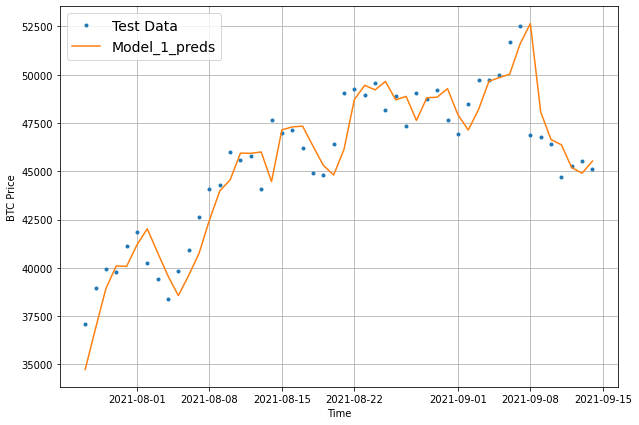

In [59]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10,7))
# Account for test_window offfset and index into test_labels
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="Model_1_preds")

## Model 2: Dense, window size=30, horizon=1

In [60]:
HORIZON=1
WINDOW_SIZE=30

In [61]:
full_windows_30, full_labels_30 = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows_30), len(full_labels_30)

(2477, 2477)

In [62]:
train_windows_30, test_windows_30, train_labels_30, test_labels_30 = make_train_test_splits(windows=full_windows_30, labels=full_labels_30)

In [63]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# Construct a model
model_2 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dense(HORIZON, activation="linear")
], name="model_2_dense" #will be used for model checkpoints
)

# Compile the model
model_2.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [64]:
# Fit the model
model_2.fit(x=train_windows_30,
            y=train_labels_30,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_30, test_labels_30),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 1459.1494 - mae: 1459.1494 - mse: 6641770.0000 - val_loss: 6880.8169 - val_mae: 6880.8169 - val_mse: 75252104.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 612.3653 - mae: 612.3653 - mse: 1293884.8750 - val_loss: 3214.8215 - val_mae: 3214.8215 - val_mse: 21817592.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 405.6785 - mae: 405.6785 - mse: 623079.7500 - val_loss: 2198.3684 - val_mae: 2198.3684 - val_mse: 11344491.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 313.1500 - mae: 313.1500 - mse: 386446.4688 - val_loss: 1925.9360 - val_mae: 1925.9360 - val_mse: 9023485.0000
INFO:tensorflow:Assets written to: 

In [65]:
# Load in saved best performing model_1 and evaluate it on test data
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows_30, test_labels_30)

16/16 [==============================] - 0s 1ms/step - loss: 925.8048 - mae: 925.8048 - mse: 2126984.5000


[925.8048095703125, 925.8048095703125, 2126984.5]

In [66]:
# Make predictions using model_1 on the test dataset and view results
model_2_preds = make_preds(model_2, test_windows_30)
len(model_2_preds), model_2_preds[:10]

(496, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 9047.165 ,  9283.845 ,  9815.892 , 10117.7295,  9811.32  ,
         9227.1455,  8854.183 ,  8719.595 ,  9247.298 ,  9563.838 ],
       dtype=float32)>)

In [67]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_30),
                                 y_pred=model_2_preds)

In [68]:
model_2_results

{'mae': 925.80505,
 'mape': 2.875415,
 'mase': 1.0912895,
 'mse': 2126985.5,
 'rmse': 1458.4188}

In [69]:
naive_results

{'mae': 839.7061,
 'mape': 2.6012962,
 'mase': 0.9982083,
 'mse': 1825811.2,
 'rmse': 1351.2258}

In [70]:
model_1_results

{'mae': 849.2311,
 'mape': 2.6299298,
 'mase': 1.007774,
 'mse': 1869035.6,
 'rmse': 1367.1268}

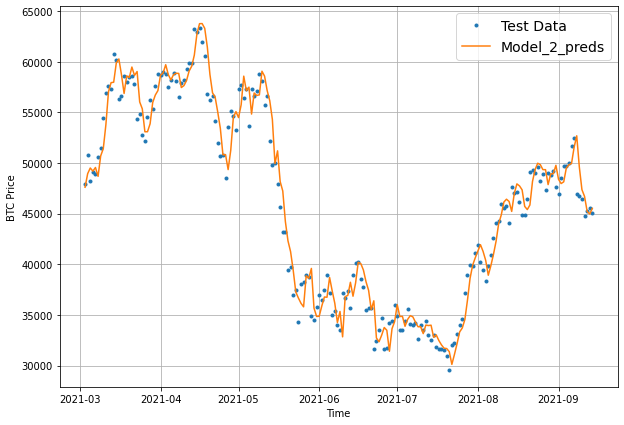

In [71]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offfset and index into test_labels
plot_time_series(timesteps=X_test[-len(test_windows_30):],
                 values=test_labels_30[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows_30):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label="Model_2_preds")

## Model 3: Dense, window_size=30, horizon=7

In [72]:
HORIZON=7
WINDOW_SIZE=30

In [73]:
full_windows_30_7, full_labels_30_7 = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows_30_7), len(full_labels_30_7)

(2471, 2471)

In [74]:
train_windows_30_7, test_windows_30_7, train_labels_30_7, test_labels_30_7 = make_train_test_splits(windows=full_windows_30_7, labels=full_labels_30_7)

In [75]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# Construct a model
model_3 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dense(HORIZON, activation="linear")
], name="model_3_dense" #will be used for model checkpoints
)

# Compile the model
model_3.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [76]:
# Fit the model
model_3.fit(x=train_windows_30_7,
            y=train_labels_30_7,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows_30_7, test_labels_30_7),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [77]:
# Load in saved best performing model_3 and evaluate it on test data
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows_30_7, test_labels_30_7)

16/16 [==============================] - 0s 976us/step - loss: 1854.4097 - mae: 1854.4097 - mse: 8854004.0000


[1854.40966796875, 1854.40966796875, 8854004.0]

In [78]:
# Make predictions using model_3 on the test dataset and view results
model_3_preds = make_preds(model_3, test_windows_30_7)
len(model_3_preds), model_3_preds[:5]

(495, <tf.Tensor: shape=(5, 7), dtype=float32, numpy=
 array([[8715.744, 8673.299, 8696.891, 8803.42 , 8863.425, 8928.062,
         8822.918],
        [8793.089, 8989.785, 8867.928, 8963.325, 9052.415, 8970.187,
         9077.554],
        [9071.137, 9158.083, 9060.305, 9304.478, 9118.872, 9107.739,
         9356.038],
        [8947.252, 9142.347, 8956.192, 9209.079, 9046.007, 9056.613,
         9196.466],
        [9010.418, 9170.906, 9068.384, 9257.739, 9369.337, 9174.664,
         9306.424]], dtype=float32)>)

In [79]:
# Evaluate preds
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_30_7),
                                 y_pred=model_3_preds)

In [80]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([495, 7]), TensorShape([496]))

### Make evaluation function work for larger horizons

In [81]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

# Account for different sized metrics (for longer horizons)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mase = tf.reduce_mean(mase)
    mape = tf.reduce_mean(mape)



  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [82]:
# Get model 3 results aggregated to a single value
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_30_7),
                                y_pred=model_3_preds)
model_3_results

{'mae': 1854.4095,
 'mape': 5.6246114,
 'mase': 2.1887033,
 'mse': 8854005.0,
 'rmse': 2107.7812}

In [83]:
import pandas as pd
res = pd.DataFrame({"naive": pd.Series(naive_results), 
                    "model_1":pd.Series(model_1_results),
                    "model_2":pd.Series(model_2_results),
                    "model_3":pd.Series(model_3_results)
                    })
res

,naive,model_1,model_2,model_3
mae,8.397061e+02,8.492311e+02,9.258051e+02,1.854410e+03
mse,1.825811e+06,1.869036e+06,2.126986e+06,8.854005e+06
rmse,1.351226e+03,1.367127e+03,1.458419e+03,2.107781e+03
mape,2.601296e+00,2.629930e+00,2.875415e+00,5.624611e+00
mase,9.982083e-01,1.007774e+00,1.091290e+00,2.188703e+00


### Visualize model 3 preds


In [84]:
model_3_predictions = tf.squeeze(model_3_preds)
model_3_predictions

<tf.Tensor: shape=(495, 7), dtype=float32, numpy=
array([[ 8715.744,  8673.299,  8696.891, ...,  8863.425,  8928.062,
         8822.918],
       [ 8793.089,  8989.785,  8867.928, ...,  9052.415,  8970.187,
         9077.554],
       [ 9071.137,  9158.083,  9060.305, ...,  9118.872,  9107.739,
         9356.038],
       ...,
       [50155.82 , 50202.113, 49581.953, ..., 50708.906, 50717.73 ,
        51219.844],
       [51305.64 , 51753.824, 50370.527, ..., 52147.453, 51317.254,
        52199.223],
       [51554.91 , 52377.84 , 51435.72 , ..., 52733.652, 52806.62 ,
        52537.062]], dtype=float32)>

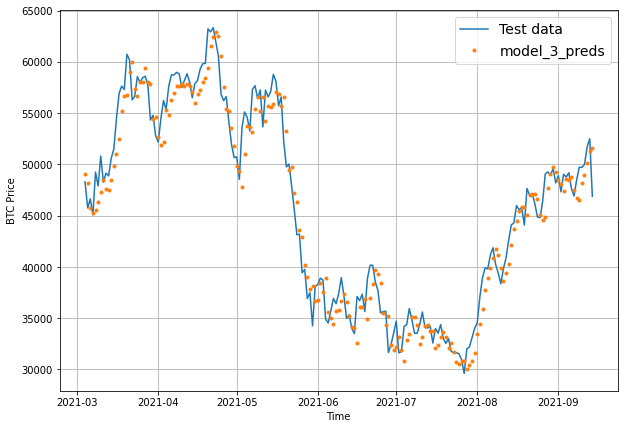

In [85]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], start=offset, label="Test data", format='-')
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], values=model_3_preds[:,0], start=offset, label='model_3_preds')

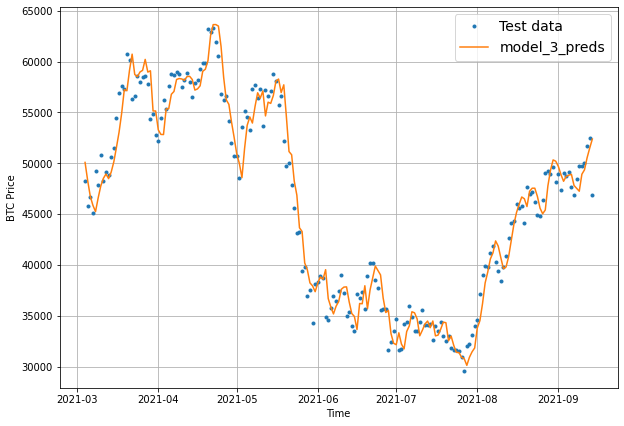

In [86]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset, 
                 label='model_3_preds',
                 format='-')

### Comparing the models' performance



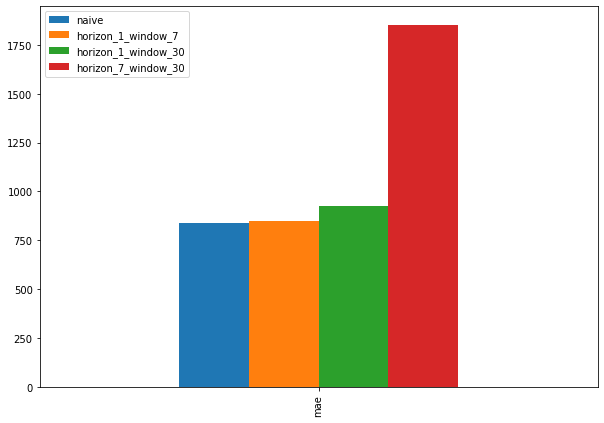

In [87]:
pd.DataFrame({"naive":naive_results['mae'],
              "horizon_1_window_7": model_1_results['mae'],
              "horizon_1_window_30": model_2_results['mae'],
              "horizon_7_window_30": model_3_results['mae']}, index=['mae']).plot(figsize=(10,7), kind='bar')

## Model 4: Conv1D

In [88]:
HORIZON = 1
WINDOW_SIZE = 7

In [89]:
# Create a windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [90]:
len(full_windows), len(full_labels)

(2500, 2500)

In [91]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2000, 2000, 500, 500)

To use Con1D we need an input shape of: `(batch_size, timesteps, input_dim)`

In [92]:
train_windows[0].shape # returns (WINDOW_SIZE)

(7,)

### Reshape the data before we pass it to Conv1D

In [93]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
       358.50166])>

In [94]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))#add extra dimension for input

In [95]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") #WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: \n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: 
[[324.71832]
 [332.45667]
 [336.585  ]
 [346.775  ]
 [344.81165]
 [343.065  ]
 [358.50165]]


### Build the model

In [96]:
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
      tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
      tf.keras.layers.Dense(HORIZON)
], name='model_4_conv1d')

# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

In [97]:
# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets wr

### Evaluate the model

In [98]:
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 959us/step - loss: 849.6600


849.6600341796875

### Load back the best-performing model and rre-evaluate

In [99]:
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d")

In [100]:
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 940us/step - loss: 849.6600


849.6600341796875

### Make predictions

In [101]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8920.387, 9010.077, 8975.92 , 8939.574, 8994.141, 9339.072,
       9864.471, 9995.871, 9743.318, 8975.637], dtype=float32)>

### Evaluate predictions

In [102]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 849.66003,
 'mape': 2.6353695,
 'mase': 1.008283,
 'mse': 1870579.0,
 'rmse': 1367.6912}

In [103]:
model_1_results

{'mae': 849.2311,
 'mape': 2.6299298,
 'mase': 1.007774,
 'mse': 1869035.6,
 'rmse': 1367.1268}

## Model 5 : RNN (LSTM)

In [104]:
tf.random.set_seed(42)

# Use functional API
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation='relu')(x)
#x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')

#Compile 
model_5.compile(loss='mae', optimizer=tf.keras.optimizers.Adam())

# Fit 
model_5.fit(train_windows, 
            train_labels, 
            epochs=100, 
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 3129.5657 - val_loss: 15525.1943
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1411.0444 - val_loss: 3577.7295
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 345.8933 - val_loss: 1838.5973
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 256.2125 - val_loss: 1532.1210
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 231.0884 - val_loss: 1505.6687
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 223.1927 - val_loss: 1437.2903
INFO:te

In [105]:
# Load in best version of model 5 and evaluate on test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 907.1747


907.1747436523438

In [106]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8903.445, 8998.857, 9044.764, 8921.238, 8962.52 ], dtype=float32)>

In [107]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 907.17487,
 'mape': 2.8139749,
 'mase': 1.0765352,
 'mse': 2030321.5,
 'rmse': 1424.8936}

In [108]:
model_1_results

{'mae': 849.2311,
 'mape': 2.6299298,
 'mase': 1.007774,
 'mse': 1869035.6,
 'rmse': 1367.1268}

## Make a multivariate dataset

In [109]:
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [110]:
# Add halving events as a feature
block_reward_1 = 50 # Jan 3, 2009 - (won't be included, too early
block_reward_2 = 25 # Nov 8, 2012
block_reward_3 = 12.5 #Jul 9, 2016
block_reward_4 = 6.25 #May 18, 2020

# Bloack reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [111]:
# Create data ranges of where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - btc_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_df.index[0]).days

print(block_reward_2_days, block_reward_3_days)

613 2022


In [112]:
# Add in a block_reward column
bitcoin_prices_block = btc_df.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [113]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-11-04,324.71833,25
2014-11-05,332.45666,25
2014-11-06,336.58500,25
2014-11-07,346.77500,25
2014-11-08,344.81166,25


In [114]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-09-10,46404.364481,6.25
2021-09-11,44720.755550,6.25
2021-09-12,45253.130625,6.25
2021-09-13,45510.563249,6.25
2021-09-14,45097.797218,6.25


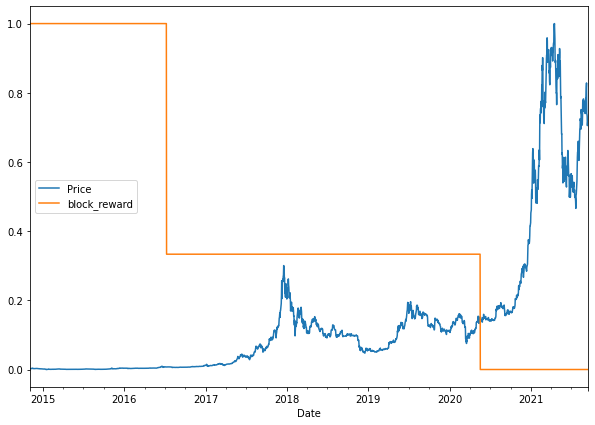

In [115]:
# Plot the block rreward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [116]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
# Make a copy of bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)


In [118]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-04,324.71833,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [119]:
# Create X (windows) and y(horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-11,25.0,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323
2014-11-12,25.0,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665
2014-11-13,25.0,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991
2014-11-14,25.0,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994
2014-11-15,25.0,389.003326,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646


In [120]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2000, 2000, 500, 500)

## Model 6: Dense (multivariate timeseries)

In [121]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Commpile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(X_train, 
            y_train,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 684.9950 - val_loss: 1624.0962
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 248.7472 - val_loss: 1685.2360
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 226.1242 - val_loss: 1384.7915
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 212.2347 - val_loss: 1308.7386
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 195.1886 - val_loss: 1298.6288
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 184.8293 - val_loss: 1368.6249
Epoch 7/100
63/63 [=========

In [122]:
# Evaluate
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 861us/step - loss: 882.4774


882.4773559570312

In [123]:
# Load in and evaluate the best performing parameters
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")

In [124]:
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 965us/step - loss: 836.2916


836.2915649414062

In [125]:
# Make predictions with multivariate model
model_6_predictions = tf.squeeze(model_6.predict(X_test))

In [126]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_predictions)

In [127]:
model_6_results

{'mae': 836.2916,
 'mape': 2.5924397,
 'mase': 0.9924188,
 'mse': 1831093.5,
 'rmse': 1353.1791}

In [128]:
model_1_results

{'mae': 849.2311,
 'mape': 2.6299298,
 'mase': 1.007774,
 'mse': 1869035.6,
 'rmse': 1367.1268}

In [129]:
naive_results

{'mae': 839.7061,
 'mape': 2.6012962,
 'mase': 0.9982083,
 'mse': 1825811.2,
 'rmse': 1351.2258}

## Model 7: N-BEATs algorithm

Replicating the algorithm from the <a href="https://arxiv.org/abs/1905.10437">following paper</a>.

### Building and testing the N-BEATS block layer

In [131]:
# Create NBeatBlock custom layer since it doesn't exist in TF

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int, 
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers (each has ReLU activation)
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    #Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast



In [135]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [136]:
# Create dummy inputs
# has to reflect Dense layer 
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [137]:
# Pass dummy inputs to dummy NBeats layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [ 0.07960147  0.32512042 -0.8428684  -0.6938984  -0.31720543 -0.56987345
 -0.6396661 ]
Forecast: 1.0071649551391602


## Preparing data for the N-BEATS algorithm using `tf.data`

In [138]:
HORIZON = 1
WINDOW_SIZE = 7

In [139]:
# Crreate N-BEATS data inputs
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [141]:
# Add windowed columns
bitcoin_prices_nbeats = btc_df.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-04,324.71833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [142]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2000, 2000, 500, 500)

### Use tf.data API


In [143]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters